In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


#importing data 
df = pd.read_csv('new_train.csv')

#checking the values of cells
df.head

<bound method NDFrame.head of        age           job   marital            education  default housing loan  \
0       49   blue-collar   married             basic.9y  unknown      no   no   
1       37  entrepreneur   married    university.degree       no      no   no   
2       78       retired   married             basic.4y       no      no   no   
3       36        admin.   married    university.degree       no     yes   no   
4       59       retired  divorced    university.degree       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
32945   28      services    single          high.school       no     yes   no   
32946   52    technician   married  professional.course       no     yes   no   
32947   54        admin.   married             basic.9y       no      no  yes   
32948   29        admin.   married    university.degree       no      no   no   
32949   35        admin.   married    university.degree       no      no  yes  

In [90]:
#dropping target column from data set and assigning it to a new varibale
X = df.drop('y', axis=1)
y = df['y']


print(X.head(), y.head())

   age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome  
0  nonexistent  
1      failure  
2  nonexistent  
3  nonexistent  
4  nonexistent   0     no
1     no
2 

<Axes: >

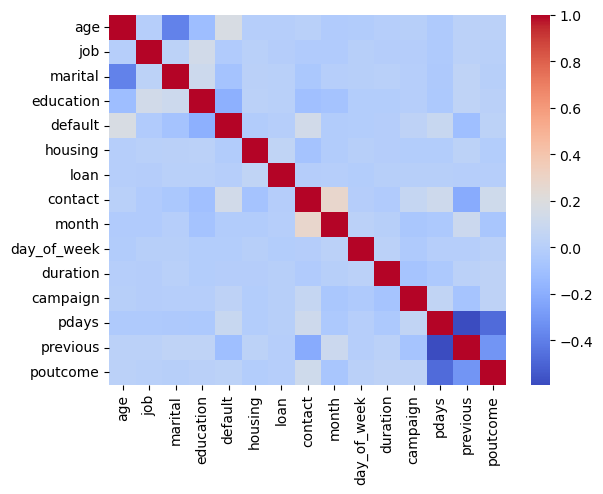

In [91]:
#converting catgegorical data into numerical data, it is needed for the model, otherwise it will not be able to predict the outcome

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])


#Checking data in X data set, exploring data corelation to improve model performance
sns.heatmap(X.corr(), cmap='coolwarm')

In [92]:
#dropping correlation higher than 0,8, which affect the accuaracy of the model.
# High correlation is can make model multicollinear, whihc means that the model could become harder to inetrpet.
#At first I need to check the model and its accuaracy, maybe the pairs doesnt affect it that much.
correlated_pairs = []

for i in range(len(X.columns)):
    for j in range(i):
        if abs(X.iloc[i, j]) > 0.9:
            colname_i = X.columns[i]
            colname_j = X.columns[j]
            correlated_pairs.append((colname_i, colname_j))

print(correlated_pairs)

[('job', 'age'), ('marital', 'age'), ('marital', 'job'), ('education', 'age'), ('education', 'marital'), ('default', 'age'), ('default', 'job'), ('default', 'education'), ('housing', 'age'), ('housing', 'marital'), ('housing', 'education'), ('loan', 'age'), ('loan', 'job'), ('loan', 'marital'), ('loan', 'education'), ('contact', 'age'), ('contact', 'job'), ('contact', 'marital'), ('contact', 'housing'), ('month', 'age'), ('month', 'job'), ('month', 'marital'), ('month', 'default'), ('month', 'contact'), ('day_of_week', 'age'), ('day_of_week', 'marital'), ('day_of_week', 'education'), ('day_of_week', 'housing'), ('day_of_week', 'month'), ('duration', 'age'), ('duration', 'job'), ('duration', 'education'), ('duration', 'housing'), ('duration', 'month'), ('duration', 'day_of_week'), ('campaign', 'age'), ('campaign', 'job'), ('campaign', 'marital'), ('campaign', 'education'), ('campaign', 'housing'), ('campaign', 'contact'), ('campaign', 'month'), ('campaign', 'duration'), ('pdays', 'age')

In [93]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#checking if both sets does match regarding X and y(target)
print(X_train.shape, y_train.shape)

(26360, 15) (26360,)


In [94]:
#Importing and training the model, setting the neighbors, assigning variable to 4, so it is easier to fetch the model for the most accurate result,
# if needed from previous part I can drop highly correlated values.
k = 7
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
#using the trained model the test set which we sepearetd previously
y_prediction = knn_classifier.predict(X_test)

In [96]:
#Evaluating the model, with accuaracy scoe, classification report and confusion matrix, after evaluation fetching can be done.
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Accuaracy score in this case is 89.5%, this means that the model correctly predicts the target at 89.5% accuracy.
print("Accuracy score:", accuracy_score(y_test, y_prediction))

#Precission measures the accuracy of positive predictions. In this case, the model predicts "no" correctly 92% of all the times, while "yes", predicts only 59% of the time after fetching.
#Recall (Sensitivity) it measures the ability to predict instances of class. This case shows, that the model correctly identifies 96% of "no" instances and 39% "y"es instances.
#F1-score is the mean between precision and recall. It indicates perfect precision and recall. The closer to 0 the less it is precise. 
#Support shows the number of each class in the test set.
print("Classification report", classification_report(y_test, y_prediction))

#Confusion matrix identifies model's predictions. It helps to understand the type and number of errors this model is making. 
print("Confusion matrix", confusion_matrix(y_test, y_prediction))


#Summary: 
#In general model is working good with "no" predictions, while "yes" predictions requires more research and optimization in order to increase the accuaracy.

Accuracy score: 0.8946889226100152
Classification report               precision    recall  f1-score   support

          no       0.92      0.96      0.94      5798
         yes       0.59      0.39      0.47       792

    accuracy                           0.89      6590
   macro avg       0.76      0.68      0.71      6590
weighted avg       0.88      0.89      0.88      6590

Confusion matrix [[5589  209]
 [ 485  307]]


/Users/karolisliubavicius/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/karolisliubavicius/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/karolisliubavicius/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/karolisliubavicius/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

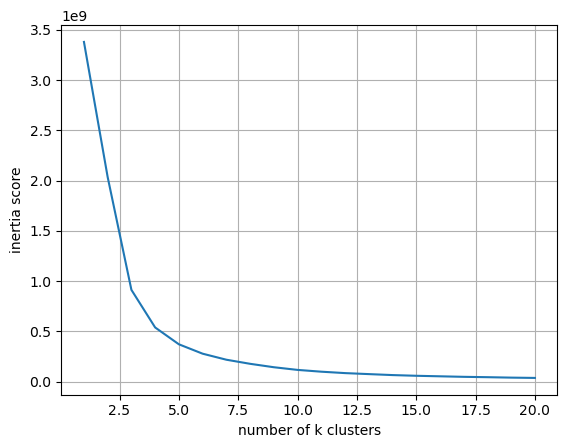

In [97]:
#Fetching the model using the Elbow method to find the optimal k value for the most accurate oprediction.
#The elbow score in this case indicates the optimal k value. The optimal k value is 7 in this case, 
#since after 7 iterations starts to plateau, 
#which indicates that after k value of 7 does not change perform any better. I mannualy change the k value in the model it self.
from sklearn.cluster import KMeans

k_values = range(1, 21)

scores = []

for k in k_values:
   kmeans = KMeans(n_clusters=k, random_state=0)
   kmeans.fit(X)
   scores.append(kmeans.inertia_)


plt.plot(k_values, scores)
plt.xlabel("number of k clusters")
plt.ylabel("inertia score")
plt.grid(True)
plt.show()


